In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
# Reading csv as a dataframe
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# First look at its main features (head, shape, info).
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#Rename the columns so they follow the PE8 (snake case).
# Standardization of header names
def standardization(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

In [7]:
standardization(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [9]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [10]:
# Check NaN values per column.
def nulls_data(df):
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_null_values'] 
    return nulls_df
nulls_data(customer_df)

,header_name,%_null_values
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [11]:
# Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
num = customer_df.select_dtypes(include = np.number)
cat = customer_df.select_dtypes(include = np.object)
categorical_columns = customer_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns 



['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [12]:
#Load the continuous and discrete variables into continuous_df and discrete_df variables.
def continuous_discrete(df):
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    continuos = []
    discrete = []
    for col in numerical_columns:
        if df[col].nunique() / len(df[col]) <= 0.05:
            discrete.append(col)
        else:
            continuos.append(col)
    return df[continuos], df[discrete]  
    

In [13]:
continuous_df, discrete_df = continuous_discrete(customer_df)

In [14]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [15]:
discrete_df

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,69,32,5,0,1
1,2011-01-31,94,13,42,0,8
2,2011-02-19,108,18,38,0,2
3,2011-01-20,106,18,65,0,7
4,2011-02-03,73,12,44,0,1
...,...,...,...,...,...,...
9129,2011-02-10,73,18,89,0,2
9130,2011-02-12,79,14,28,0,1
9131,2011-02-06,85,9,37,3,2
9132,2011-02-03,96,34,3,0,3


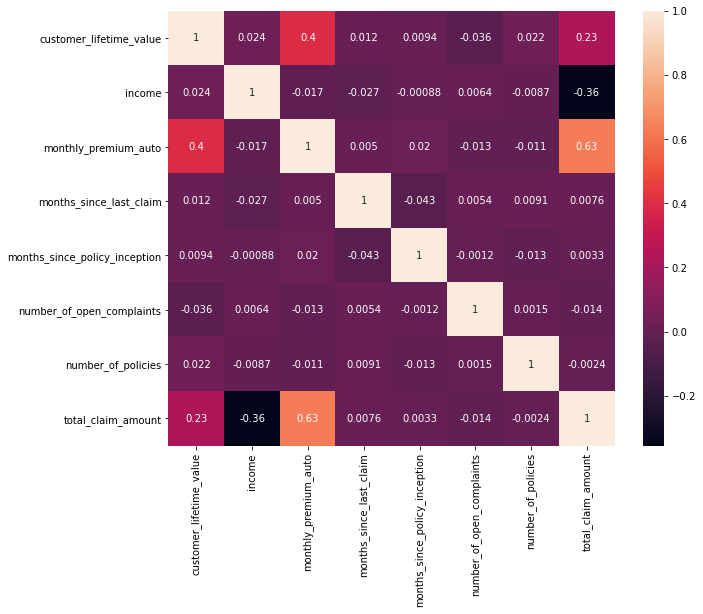

In [16]:
#Plot a correlation matrix, what can you see?
corr_matrix=num.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# we can see the correlation between different variables. monthly_premium_auto and total_claim_amount have the highest correlation wuth each other.

In [17]:
# Get the numerical variables from our dataset.
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
def plot_numerical(df,cols):
    for col in cols:
        sns.distplot(df[col],bins= 100, 
                       color = 'blue')
        plt.title('Distribution')
        plt.show()

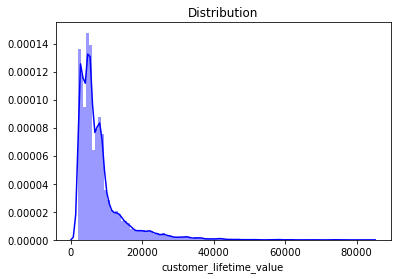

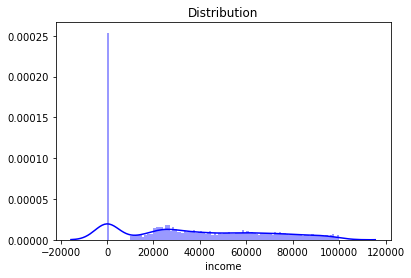

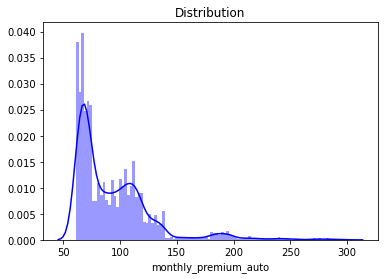

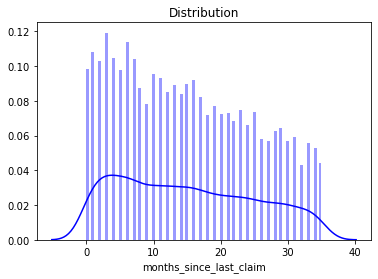

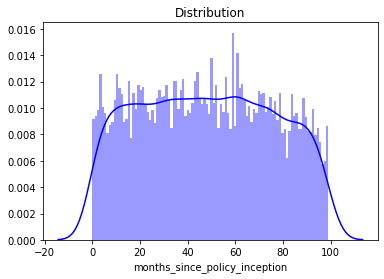

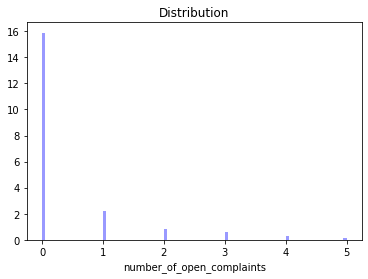

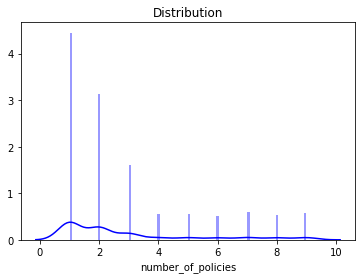

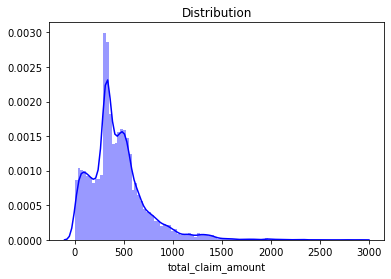

In [18]:
#num2 = num.drop(['effective_to_date'])
num2 = num.copy()
numerical_columns2 = num.columns
plot_numerical(num2,numerical_columns2)

we can see that the distribution of the numerical data shows that they are skewed!

In [19]:
# Fixing skewness of numerical features using log_transformation
from scipy.stats import norm, skew, boxcox_normmax
skewed_features = num2.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
high_skew

customer_lifetime_value      3.031782
number_of_open_complaints    2.782806
monthly_premium_auto         2.123198
total_claim_amount           1.714684
number_of_policies           1.253127
dtype: float64

In [21]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
num3=num.copy()
for i in skew_index:
    num3[i] = np.log1p(num2[i])
num3

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,56274,4.248495,32,5,0.000000,0.693147,5.955348
1,8.850881,0,4.553877,13,42,0.000000,2.197225,7.032152
2,9.464085,48767,4.691348,18,38,0.000000,1.098612,6.341192
3,8.942051,0,4.672829,18,65,0.000000,2.079442,6.274539
4,7.942608,43836,4.304065,12,44,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0.000000,1.098612,5.294484
9130,8.038354,21604,4.382027,14,28,0.000000,0.693147,5.940697
9131,9.007599,0,4.454347,9,37,1.386294,1.098612,6.674290
9132,8.926045,21941,4.574711,34,3,0.000000,1.386294,6.539875


In [22]:
num3.rename(columns={'customer_lifetime_value': 'customer_lifetime_value_log', 'number_of_open_complaints': 'number_of_open_complaints_log','monthly_premium_auto':'monthly_premium_auto_log','total_claim_amount': 'total_claim_amount_log', 'number_of_policies': 'number_of_policies_log'}, inplace = True)
num3

,customer_lifetime_value_log,income,monthly_premium_auto_log,months_since_last_claim,months_since_policy_inception,number_of_open_complaints_log,number_of_policies_log,total_claim_amount_log
0,7.924622,56274,4.248495,32,5,0.000000,0.693147,5.955348
1,8.850881,0,4.553877,13,42,0.000000,2.197225,7.032152
2,9.464085,48767,4.691348,18,38,0.000000,1.098612,6.341192
3,8.942051,0,4.672829,18,65,0.000000,2.079442,6.274539
4,7.942608,43836,4.304065,12,44,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0.000000,1.098612,5.294484
9130,8.038354,21604,4.382027,14,28,0.000000,0.693147,5.940697
9131,9.007599,0,4.454347,9,37,1.386294,1.098612,6.674290
9132,8.926045,21941,4.574711,34,3,0.000000,1.386294,6.539875


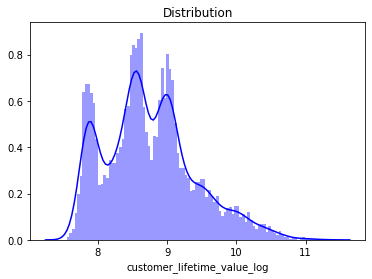

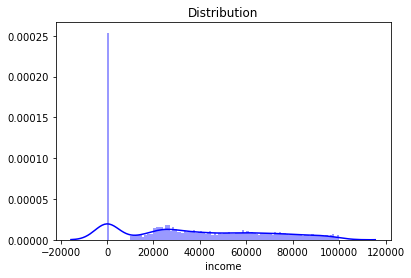

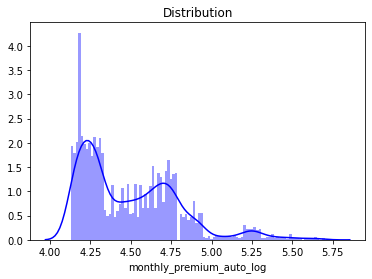

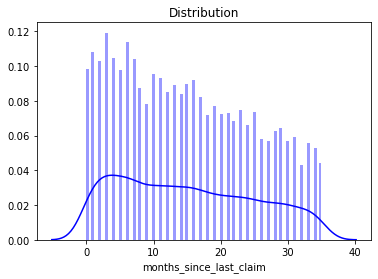

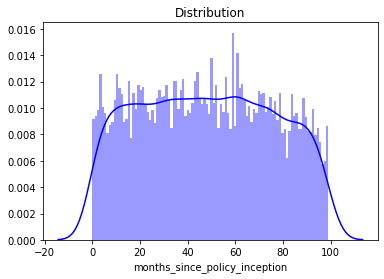

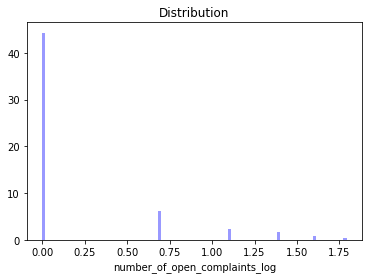

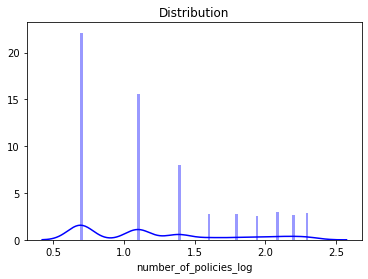

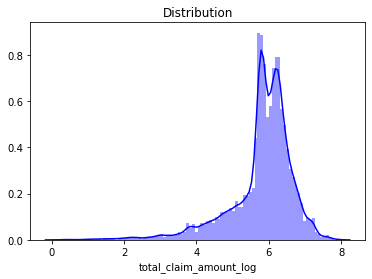

In [23]:
numerical_columns3 = num3.columns
plot_numerical(num3,numerical_columns3)

Log_transform make the variable closer to the normal distribution.